
# ASSIGNED Putting the fun in functions



The van der Waals equation of state for a gas is defined by:

$\left(P + \frac{a}{V^2}\right)(V - b) = RT$

where $a$ and $b$ are defined by:

$a = \frac{27}{64}\left(\frac{R^2 T_c^2}{P_c}\right)$

$b = \frac{R T_c}{8 P_c}$

In these equations, $V$ is the molar volume, $P$ is the pressure, and $T$ is the temperature.

$R$ is the gas constant, $P_c$ is the critical pressure of
the gas, and $T_c$ is the critical temperature.

For ammonia, $P_c = 111.3$ atm, $T_c = 405.5$ K, and in these units, $R = 0.08206$ (atm L)/(mol K).

Suppose the temperature is 450 K, and the pressure is 56 atm. Now, the only undefined quantity is the molar volume, and we would like to solve for it. We have not learned how to do this yet, so today we will just use a graphical method to estimate how to do it.

It is not worth the effort to do all the algebra required to find $V$. Instead, we recognize that the solution will be the value of $V$ that makes the following equation true:

$f(V) = \left(P + \frac{a}{V^2}\right)(V - b) - RT = 0$

So, if we define the function above, and plot it for some range of $V$, we can graphically estimate the solution by looking on the graph where is the function equal to zero.




## Define a f(V)



Define a function for f(V) as defined above.



Your function should work for a single value of $V$, or a numpy.array of values.




## Plot f(V) over a range of V, and find a solution to the equation



Make a plot for an array of $V$ values (e.g. use np.linspace to create an array).

You can estimate the solution from the graph by looking for where the function intersects the x-axis. Adjust the molar volume range so you can estimate the solution to two decimal places.

Note: you can turn grid-lines on your plot with the line `plt.grid()`




## solution



Most operators and functions work on arrays and numbers, so it doesn't take any special care in this case to write a function that works on both arrays and numbers. This function will not work on a list of volumes though.



In [1]:
T = 450 # K
P = 56  # atm

Tc = 405.5  # K
Pc = 111.3  # atm
R = 0.08206 # (atm L)/(mol K)

def f(V):
    a = 27 / 64 * (R**2 * Tc**2) / Pc
    b = (R * Tc) / (8 * Pc)
    z = (P + a / V**2) * (V - b) - R * T
    return z  # atm L / mol

You can demonstrate it works on both data types like this:



In [1]:
f(0.5)  # a single number

-3.2532761747281285

In [1]:
import numpy as np
f(np.array([0.5, 0.6]))

array([-3.25327617,  1.13944127])

Note, you cannot use it on a list. See the end of the solution for a way to fix this.



In [1]:
f([0.5, 0.6])

TypeErrorTraceback (most recent call last)
<ipython-input-4-1b72b76b8f65> in <module>()
----> 1 f([0.5, 0.6])

<ipython-input-1-9e1fa074cf64> in f(V)
      9     a = 27 / 64 * (R**2 * Tc**2) / Pc
     10     b = (R * Tc) / (8 * Pc)
---> 11     z = (P + a / V**2) * (V - b) - R * T
     12     return z  # atm L / mol

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

To find the solution, we make an array of volumes, and then plot our function on those values.



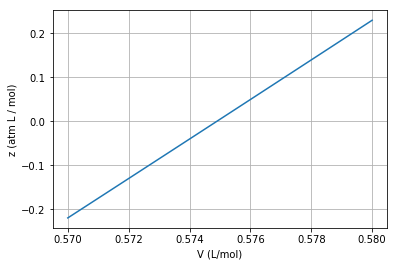

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

V = np.linspace(0.57, 0.58)
plt.plot(V, f(V))
plt.xlabel('V (L/mol)')
plt.ylabel('z (atm L / mol)')
plt.grid()

You can see from the graph the solution is just below V = 0.575 L/mol, so to two decimal places, the solution is V = 0.57 L/mol.

You should always use full sentences in your work, and avoid typos. Imagine you are turning this in to a future boss, who will not want to see typos, and will not want to guess what they should get out of a graph. You should be specific about your interpretations.




## General comments



It is not necessary to comment every line of code. Comments like these are not helpful:



In [1]:
a = 5 # set the variable a equal to 5
x = np.linspace(0, 1) # create an array from 0 to 1

Put blank lines in your code to separate them into logical units, e.g. a group of variable assignments, a function definition, etc. This makes your code more readable.

It is not necessary to define your function in every single code block. Define it once, and reuse it.

It is not necessary to do more than I ask in the homeworks. You don't get extra credit for it.




## Miscellaneous notes



Note that if you use a list as your argument, you will get this error:



In [1]:
f([0.5, 0.6])

TypeErrorTraceback (most recent call last)
<ipython-input-14-1b72b76b8f65> in <module>()
----> 1 f([0.5, 0.6])

<ipython-input-1-b110c0b0c9e2> in f(V)
      9     a = 27 / 64 * (R**2 * Tc**2) / Pc
     10     b = (R * Tc) / (8 * Pc)
---> 11     z = (P + a / V**2) * (V - b) - R * T
     12     return z

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

The problem is that you cannot do math on lists like you can with arrays. A common solution to this is to make the first line of your function convert the input to an array (see next code cell). This will convert lists to an array so that array math is possible.



In [1]:
def f2(V):
    V = np.array(V) # make sure the input is an array
    a = 27 / 64 * (R**2 * Tc**2) / Pc
    b = (R * Tc) / (8 * Pc)
    z = (P + a / V**2) * (V - b) - R * T
    return z

# Now all three types work
f2(0.5), f2([0.5, 0.6]), f2(np.array([0.5, 0.6]))

(-3.2532761747281285,
 array([-3.25327617,  1.13944127]),
 array([-3.25327617,  1.13944127]))

Note the x-ticks in this figure kind of run together and are difficult to read.



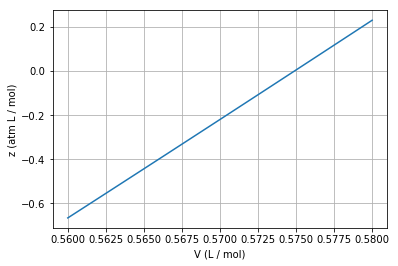

In [1]:
V = np.linspace(0.56, 0.58)
plt.plot(V, f(V))
plt.xlabel('V (L / mol)')
plt.ylabel('z (atm L / mol)')
plt.grid()

You can specify where you want the ticks like this. Here I put an intermediate tick that is approximately at z=0.



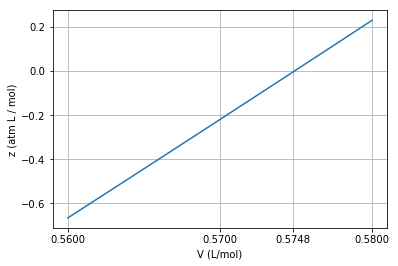

In [1]:
V = np.linspace(0.56, 0.58)
plt.plot(V, f(V))
plt.xlabel('V (L/mol)')
plt.ylabel('z (atm L / mol)')
plt.grid()

plt.xticks([0.56, 0.57, 0.5748, 0.58]); # ; suppresses output of matplotlib